## Fiveer Project; Time Series Analysis using ARIMA Model

In [48]:
#importing main lib

import warnings
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('fivethirtyeight')

In [47]:
#data variable
file = "time_series.xlsx"
sheet = "Sheet1"

In [52]:
#loading data
df = pd.read_excel(file,sheet_name=sheet)
y = pd.read_excel(file,sheet_name=sheet, index_col="Months") #changing index of data to Months

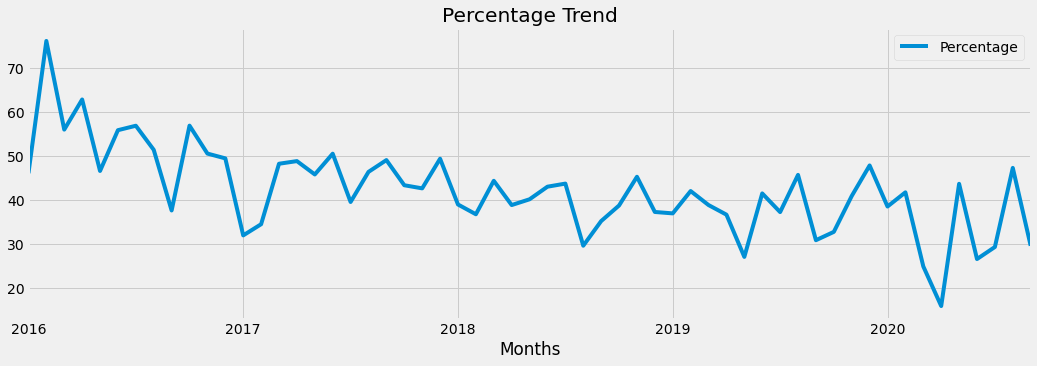

In [50]:
#plotting data to check for trend
y.plot(grid = True, title="Percentage Trend", figsize=(16,5))
plt.show()

In [51]:
#loading data again with squeeze = True to apply ADF test
df1 = pd.read_excel(file,sheet_name=sheet, index_col = 0, squeeze = True)
result = adfuller(df1.values)
#printing results of ADF test
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.706185
p-value: 0.000082
Critical Values:
	1%: -3.553
	5%: -2.915
	10%: -2.595


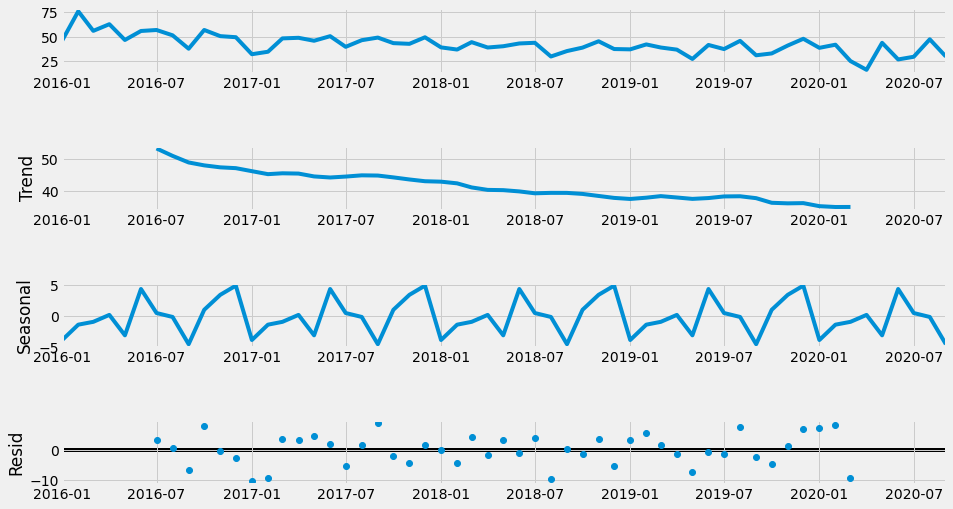

In [53]:
#decomposing data to check for variations
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
fig.set_figwidth(16)
fig.set_figheight(8)
plt.show()

### ARIMA Model Application

In [54]:
#setting ARIMA model dnotions i.e. p, d and q
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [55]:
#calculating AIC for each data point of percentage to get the p,d and q
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,\
                                            order=param,\
                                            seasonal_order=param_seasonal,\
                                            enforce_stationarity=False,\
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:583.0993126452249
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:423.4695067686395
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:339.7579906194102
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1068.7013064849145
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:332.813539398247
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:323.64696062501474
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:244.4116634785546
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1399.4862020483092
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:516.4684552917616
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:386.19064805824445
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:318.5338156217635
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1254.4750055375678
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:334.85476209431704
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:308.4195493016963
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:246.3600188646699
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1269.1638804846796
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:413.45252342684284
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:320.0486318025361
ARI

In [56]:
#selecting AIC:229.29 i.e. p,d,q = 1,1,1
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1179      0.169     -0.700      0.484      -0.448       0.212
ma.L1         -1.0194      0.314     -3.250      0.001      -1.634      -0.405
ar.S.L12      -0.3190      0.166     -1.925      0.054      -0.644       0.006
sigma2        65.7206     29.990      2.191      0.028       6.941     124.501


### Diagnostic Graphs

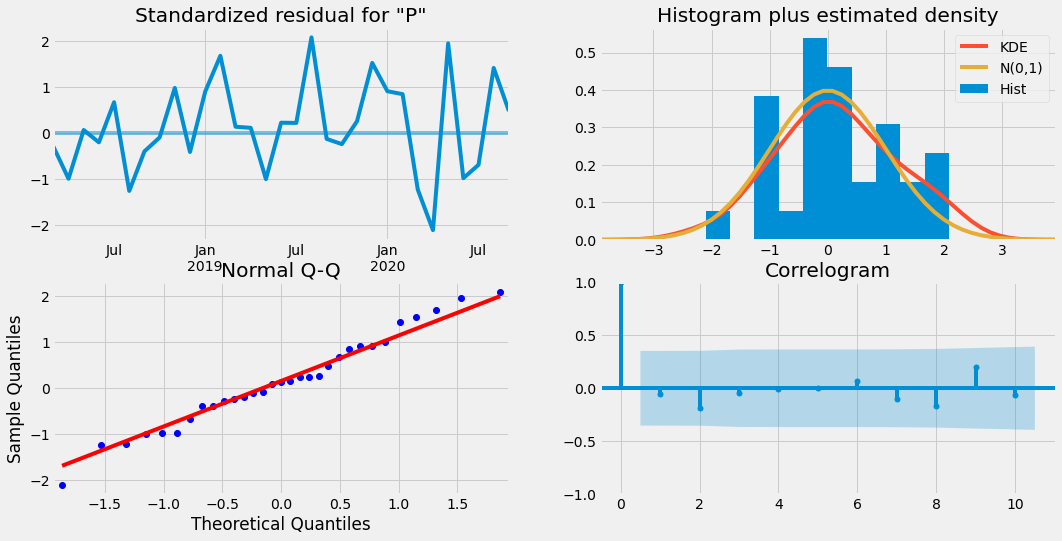

In [10]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

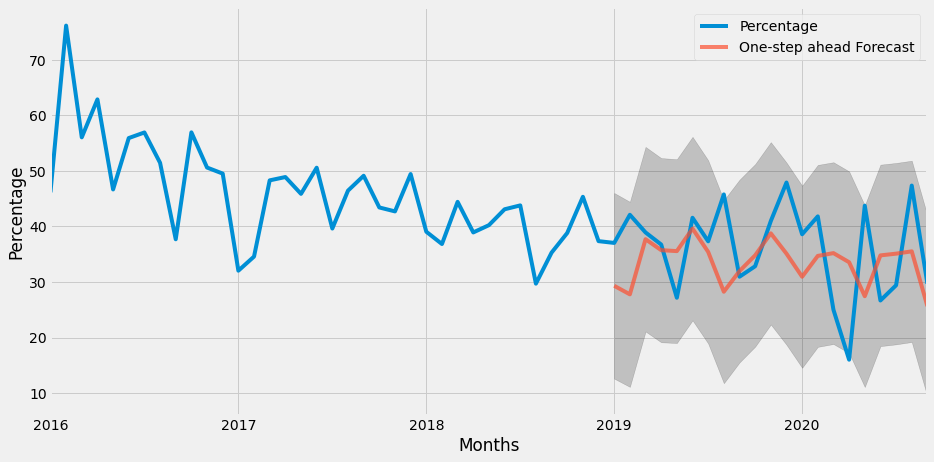

In [11]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y["2016":].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Months')
ax.set_ylabel('Percentage')
plt.legend()
plt.show()

In [57]:
#calculating forecasted percentages a
y_forecasted = pred.predicted_mean
y_truth = y['2019-01-01':]
mse = ((y_forecasted - y_truth.Percentage) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 89.04


In [26]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 9.44


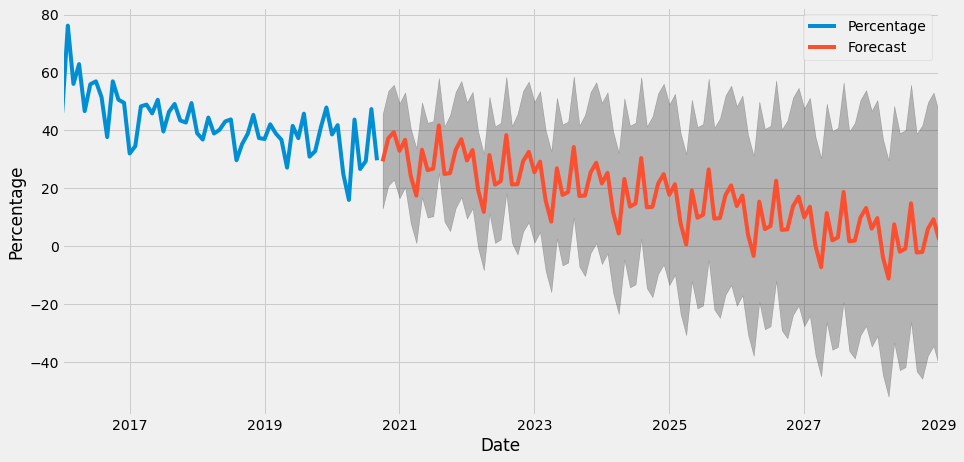

In [28]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Percentage')
plt.legend()
plt.show()

In [31]:
df_pred = pred_uc.predicted_mean.to_frame()

In [43]:
df_pred[(df_pred["predicted_mean"]>=0) & (df_pred["predicted_mean"]<=1)]

,predicted_mean
2025-04-01,0.581360
2027-03-01,0.116781
